In [1226]:
##
## Import Dependencies
##

import pandas as pd                                    # Helps preprocess data
from xgboost import XGBClassifier                      # XGBoost: machine learning algorithm (decision tree based)
from sklearn.linear_model import LogisticRegression    # LR: machine learning algorithm (categorical, S shaped)
from sklearn.ensemble import RandomForestClassifier    # RF: machine learning algorithm (decision tree based)
from sklearn.svm import SVC                            # Support Vector Machine: machine learning algorithm (threshold)
import seaborn as sns                                  # Displays data
from time import time                                  # Measure of training time
from sklearn.model_selection import cross_val_score    # Cross validation
from sklearn.metrics import accuracy_score             # Checking accuracy
from time import time                                  # Timer
from sklearn.model_selection import GridSearchCV       # Perfroms grid search to help optimize models
import numpy as np                                     # Used for logspace
%matplotlib inline

In [1180]:
# Loads data

data = pd.read_csv('20_21.csv')

In [1181]:
# Display categories

data.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [1182]:
# Display the whole table

data

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,E0,24/04/2021,17:30,West Ham,Chelsea,0,1,A,0,1,...,1.88,0.75,1.99,1.94,1.98,1.94,2.08,1.95,1.99,1.90
323,E0,24/04/2021,20:00,Sheffield United,Brighton,1,0,H,1,0,...,1.71,1.00,1.82,2.11,1.83,2.12,1.87,2.13,1.83,2.05
324,E0,25/04/2021,12:00,Wolves,Burnley,0,4,A,0,3,...,1.57,-0.25,2.05,1.88,2.05,1.88,2.08,1.98,2.02,1.87
325,E0,25/04/2021,14:00,Leeds,Man United,0,0,D,0,0,...,2.05,0.75,1.84,2.09,1.86,2.07,1.96,2.12,1.86,2.04


In [1183]:
# Filtering data

# (.ix): slices rows or columns, 1st arg = row, 2nd arg = col
data_20 = data.iloc[:,:23]

# (.drop): drops rows or columns, 1st arg = label name, 2nd arg = (0 = row) (1 = col)
data_20 = data_20.drop(['Div', 'Date', 'Time'], axis=1)

In [1184]:
# Checking if filtering worked

data_20

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
0,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0
1,Crystal Palace,Southampton,1,0,H,1,0,H,J Moss,5,9,3,5,14,11,7,3,2,1,0
2,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0
3,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0
4,West Brom,Leicester,0,3,A,0,0,D,A Taylor,7,13,1,7,12,9,2,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,West Ham,Chelsea,0,1,A,0,1,A,C Kavanagh,9,17,2,6,9,11,4,2,0,4,1
323,Sheffield United,Brighton,1,0,H,1,0,H,K Friend,7,17,3,4,13,7,2,12,3,0,0
324,Wolves,Burnley,0,4,A,0,3,A,D England,12,14,2,7,8,9,8,5,1,2,0
325,Leeds,Man United,0,0,D,0,0,D,C Pawson,6,16,3,4,21,11,2,6,4,1,0


In [1185]:
# Creates a table
#       Team, Home Goals Scored, Away Goals Score, Attack Power, Home Goals Conceded, Away Goals Conceded, Defense Power

table_20 = pd.DataFrame(columns=('Team','HGS','AGS','HAP','AAP','HGC','AGC','HDP','ADP',))


In [1186]:
# Finding average goals 
#       (used for finding attack and defence power)
#       AHS = avg home scored, AAS = avg away scored, AHC = avg home conceded, AAC = avg away conceded

AHS = data_20.FTHG.sum() / data_20.shape[0]
AAS = data_20.FTAG.sum() / data_20.shape[0]
AHC = AHS
AAC = AAS

print(f'Avg home goals scored: {AHS}')
print(f'Avg away goals scored: {AAS}\n')
print(f'Avg home goals conceded: {AHC}')
print(f'Avg away goals conceded: {AAC}')

Avg home goals scored: 1.3302752293577982
Avg away goals scored: 1.3211009174311927

Avg home goals conceded: 1.3302752293577982
Avg away goals conceded: 1.3211009174311927


In [1187]:
# Grouping data by teams for home and away (no duplicates)

home = data_20.groupby('HomeTeam')
away = data_20.groupby('AwayTeam')

In [1188]:
# Calculating number of games
#        Assumes num of home games = num of away games

num_games = data_20.shape[0]/20

In [1189]:
# Listing teams and removing duplicates
teams = data_20.iloc[:,0]
lot = list(teams.sort_values())
lot = list(dict.fromkeys(lot))

# Assigning values to table
table_20.Team = lot
table_20.HGS = home.FTHG.sum().values
table_20.HGC = home.FTAG.sum().values
table_20.AGS = away.FTAG.sum().values
table_20.AGC = away.FTHG.sum().values
table_20.HAP = (table_20.HGS / num_games) / AHS
table_20.AAP = (table_20.AGS / num_games) / AAS
table_20.HDP = (table_20.HGC / num_games) / AHC
table_20.ADP = (table_20.AGC / num_games) / AAC

In [1190]:
# Checking if the table works

table_20

,Team,HGS,AGS,HAP,AAP,HGC,AGC,HDP,ADP
0,Arsenal,19,25,0.873563,1.157407,20,17,0.919540,0.787037
1,Aston Villa,26,20,1.195402,0.925926,23,14,1.057471,0.648148
2,Brighton,16,17,0.735632,0.787037,19,20,0.873563,0.925926
3,Burnley,13,17,0.597701,0.787037,18,27,0.827586,1.250000
4,Chelsea,27,24,1.241379,1.111111,16,15,0.735632,0.694444
5,Crystal Palace,16,17,0.735632,0.787037,25,27,1.149425,1.250000
6,Everton,22,22,1.011494,1.018519,25,15,1.149425,0.694444
7,Fulham,9,16,0.413793,0.740741,24,19,1.103448,0.879630
8,Leeds,22,28,1.011494,1.296296,19,31,0.873563,1.435185
9,Leicester,28,30,1.287356,1.388889,21,16,0.965517,0.740741


In [1191]:
# Isolating one team

table_20[table_20.Team == 'Man United']

,Team,HGS,AGS,HAP,AAP,HGC,AGC,HDP,ADP
12,Man United,34,30,1.563218,1.388889,21,14,0.965517,0.648148


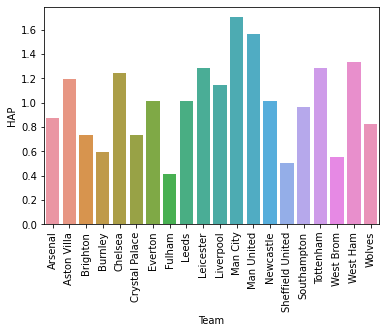

In [1192]:
# Plotting Home attacking power

HAP_plot = sns.barplot(x = table_20.Team, y = table_20.HAP)

# Rotates x lables to make it visible
for i in HAP_plot.get_xticklabels():
    i.set_rotation(90)

In [1193]:
# Creating a feature_table that contains all the fixtures
#         ftr = full time result, hst = home shots on target, ast = away shots on target

feature_table = data_20.iloc[:,:13]
feature_table = feature_table[['HomeTeam','AwayTeam','FTR']]
f_HAP = []
f_HDP = []
f_AAP = []
f_ADP = []
for index, row in feature_table.iterrows():
    f_HAP.append(table_20[table_20['Team'] == row['HomeTeam']]['HAP'].values[0])
    f_HDP.append(table_20[table_20['Team'] == row['HomeTeam']]['HDP'].values[0])
    f_AAP.append(table_20[table_20['Team'] == row['HomeTeam']]['HAP'].values[0])
    f_ADP.append(table_20[table_20['Team'] == row['HomeTeam']]['ADP'].values[0])
    
feature_table['HAP'] = f_HAP
feature_table['HDP'] = f_HDP
feature_table['AAP'] = f_AAP
feature_table['ADP'] = f_ADP

In [1194]:
# Checking if table works

feature_table

,HomeTeam,AwayTeam,FTR,HAP,HDP,AAP,ADP
0,Fulham,Arsenal,A,0.413793,1.103448,0.413793,0.879630
1,Crystal Palace,Southampton,H,0.735632,1.149425,0.735632,1.250000
2,Liverpool,Leeds,H,1.149425,0.919540,1.149425,0.879630
3,West Ham,Newcastle,A,1.333333,0.965517,1.333333,1.018519
4,West Brom,Leicester,A,0.551724,1.517241,0.551724,1.435185
...,...,...,...,...,...,...,...
322,West Ham,Chelsea,A,1.333333,0.965517,1.333333,1.018519
323,Sheffield United,Brighton,H,0.505747,1.149425,0.505747,1.435185
324,Wolves,Burnley,A,0.827586,1.011494,0.827586,1.064815
325,Leeds,Man United,D,1.011494,0.873563,1.011494,1.435185


In [1195]:
# Function to transform FTR to numeric values

def transform(row):
    '''
    Consumes row, reads FTR of the row, and returns  
    1 if its Home victory, -1 if Away victory, and 0
    if it is draw
    '''
    
    if(row.FTR == 'H'):
        return 1
    elif (row.FTR == 'A'):
        return -1
    elif (row.FTR == 'D'):
        return 0
    
# Actually transforming FTR

feature_table['Result'] = feature_table.apply(lambda x: transform(x), axis = 1)

In [1196]:
# Checking table

feature_table

,HomeTeam,AwayTeam,FTR,HAP,HDP,AAP,ADP,Result
0,Fulham,Arsenal,A,0.413793,1.103448,0.413793,0.879630,-1
1,Crystal Palace,Southampton,H,0.735632,1.149425,0.735632,1.250000,1
2,Liverpool,Leeds,H,1.149425,0.919540,1.149425,0.879630,1
3,West Ham,Newcastle,A,1.333333,0.965517,1.333333,1.018519,-1
4,West Brom,Leicester,A,0.551724,1.517241,0.551724,1.435185,-1
...,...,...,...,...,...,...,...,...
322,West Ham,Chelsea,A,1.333333,0.965517,1.333333,1.018519,-1
323,Sheffield United,Brighton,H,0.505747,1.149425,0.505747,1.435185,1
324,Wolves,Burnley,A,0.827586,1.011494,0.827586,1.064815,-1
325,Leeds,Man United,D,1.011494,0.873563,1.011494,1.435185,0


In [1228]:
# Splitting data and initializing models

X_train1 = feature_table[['HAP','HDP','AAP','ADP']]
y_train1 = feature_table['Result']

clf1 = LogisticRegression(max_iter = 5000)
clf2 = XGBClassifier(eval_metric='mlogloss')
clf3 = SVC()

In [1229]:
# Checking logistic regression accuracy

scores1 = cross_val_score(clf1, X_train1, y_train1, cv=10)

print(f"Scores of the 10 splits of test train data:\n{scores1}\n")
print(f"Averages score:\n{scores1.mean()}")

Scores of the 10 splits of test train data:
[0.45454545 0.36363636 0.54545455 0.48484848 0.54545455 0.51515152
 0.36363636 0.46875    0.46875    0.46875   ]

Averages score:
0.46789772727272727


In [1199]:
# Checking XGBoost classifier accuracy

scores2 = cross_val_score(clf2, X_train1, y_train1, cv=10)

print(f"Scores of the 10 splits of test train data:\n{scores2}\n")
print(f"Averages score:\n{scores2.mean()}")

C:\Users\Festa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Festa\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Scores of the 10 splits of test train data:
[0.3030303  0.3030303  0.51515152 0.36363636 0.45454545 0.39393939
 0.39393939 0.4375     0.375      0.375     ]

Averages score:
0.39147727272727273


In [1200]:
# Checking Support Vector Machine accuracy

scores3 = cross_val_score(clf3, X_train1, y_train1, cv=10)

print(f"Scores of the 10 splits of test train data:\n{scores3}\n")
print(f"Averages score:\n{scores3.mean()}")

Scores of the 10 splits of test train data:
[0.42424242 0.39393939 0.54545455 0.48484848 0.51515152 0.48484848
 0.39393939 0.5        0.4375     0.46875   ]

Averages score:
0.4648674242424242


In [1201]:
# Adding recent performences table

recent_table = data_20.sort_index(ascending = False)
recent_table['Result'] = recent_table.apply(lambda x: transform(x), axis = 1)
recent_table = recent_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC','Result']]

recent_table

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,Result
326,Aston Villa,West Brom,D,2,2,24,10,11,4,0
325,Leeds,Man United,D,0,0,6,16,2,6,0
324,Wolves,Burnley,A,0,4,12,14,8,5,-1
323,Sheffield United,Brighton,H,1,0,7,17,2,12,1
322,West Ham,Chelsea,A,0,1,9,17,4,2,-1
...,...,...,...,...,...,...,...,...,...,...
4,West Brom,Leicester,A,0,3,7,13,2,5,-1
3,West Ham,Newcastle,A,0,2,15,15,8,7,-1
2,Liverpool,Leeds,H,4,3,22,6,9,0,1
1,Crystal Palace,Southampton,H,1,0,5,9,7,3,1


In [1202]:
# Adding Matchday 34 fixtures of 2020/2021 season

new_fixtures = pd.DataFrame([['Southampton','Leicester', 'D',0,0,0,0,0,0,0],
                            ['Crystal Palace','Man City', 'D',0,0,0,0,0,0,0],
                            ['Brighton','Leeds', 'D',0,0,0,0,0,0,0],
                            ['Chelsea','Fulham', 'D',0,0,0,0,0,0,0],
                            ['Everton','Aston Villa', 'D',0,0,0,0,0,0,0],
                            ['Newcastle','Arsenal', 'D',0,0,0,0,0,0,0],
                            ['Man United','Liverpool', 'D',0,0,0,0,0,0,0],
                            ['Tottenham','Sheffield United', 'D',0,0,0,0,0,0,0],
                            ['West Brom','Wolves', 'D',0,0,0,0,0,0,0],
                            ['Burnley','West Ham', 'D',0,0,0,0,0,0,0]])

new_fixtures.columns = ['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC','Result']

new_fixtures = new_fixtures.sort_index(ascending=False)

In [1203]:
# Checking if new fixture works

new_fixtures

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,Result
9,Burnley,West Ham,D,0,0,0,0,0,0,0
8,West Brom,Wolves,D,0,0,0,0,0,0,0
7,Tottenham,Sheffield United,D,0,0,0,0,0,0,0
6,Man United,Liverpool,D,0,0,0,0,0,0,0
5,Newcastle,Arsenal,D,0,0,0,0,0,0,0
4,Everton,Aston Villa,D,0,0,0,0,0,0,0
3,Chelsea,Fulham,D,0,0,0,0,0,0,0
2,Brighton,Leeds,D,0,0,0,0,0,0,0
1,Crystal Palace,Man City,D,0,0,0,0,0,0,0
0,Southampton,Leicester,D,0,0,0,0,0,0,0


In [1204]:
# Appending new fixture table to recent table

temp = new_fixtures.append(recent_table, ignore_index=True)
temp = temp.sort_index(ascending=False)
temp = temp.reset_index().drop(['index'],axis=1)
recent_table = temp

In [1205]:
# Adding recent perfomence measures to the table

recent_table['pastHS'] = 0.0
recent_table['pastHC'] = 0.0
recent_table['pastAS'] = 0.0
recent_table['pastAC'] = 0.0
recent_table['pastHG'] = 0.0
recent_table['pastAG'] = 0.0
recent_table['pastHResult'] = 0.0
recent_table['pastAResult'] = 0.0

In [1206]:
# Checking if recent table works

recent_table

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,Result,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,pastHResult,pastAResult
0,Fulham,Arsenal,A,0,3,5,13,2,3,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Crystal Palace,Southampton,H,1,0,5,9,7,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Liverpool,Leeds,H,4,3,22,6,9,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,West Ham,Newcastle,A,0,2,15,15,8,7,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,West Brom,Leicester,A,0,3,7,13,2,5,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,Newcastle,Arsenal,D,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333,Man United,Liverpool,D,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
334,Tottenham,Sheffield United,D,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,West Brom,Wolves,D,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1207]:
# Adding K recent performences metrics

start = time()

k = 5
for i in range(recent_table.shape[0]-1,-1,-1):
    row = recent_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    
    home_ht = recent_table.loc[recent_table['HomeTeam'] == ht]
    away_ht = recent_table.loc[recent_table['AwayTeam'] == ht]
    all_h_games = home_ht.append(away_ht)
    all_h_games = all_h_games.sort_index(ascending=False)
    
    home_at = recent_table.loc[recent_table['HomeTeam'] == at]
    away_at = recent_table.loc[recent_table['AwayTeam'] == at]
    all_a_games = home_at.append(away_at)
    all_a_games = all_a_games.sort_index(ascending=False)
    
    temp_h = all_h_games.loc[i:].iloc[1:].head(k)
    temp_a = all_a_games.loc[i:].iloc[1:].head(k)
    h = len(temp_h)
    a = len(temp_a)
    
    if h == 0:
        h = 1
        
    if a == 0:
        a = 1
    
    recent_table.at[i,'pastHC'] = (temp_h[temp_h["AwayTeam"] == ht].sum().HC + \
                                   temp_h[temp_h["HomeTeam"] == ht].sum().HC)/h
    recent_table.at[i,'pastAC'] = (temp_a[temp_a["AwayTeam"] == at].sum().HC + \
                                   temp_a[temp_a["HomeTeam"] == at].sum().HC)/a
    recent_table.at[i,'pastHS'] = (temp_h[temp_h["AwayTeam"] == ht].sum().HS + \
                                   temp_h[temp_h["HomeTeam"] == ht].sum().AS)/h
    recent_table.at[i,'pastAS'] = (temp_a[temp_a["AwayTeam"] == at].sum().HS + \
                                   temp_a[temp_a["HomeTeam"] == at].sum().AS)/a
    recent_table.at[i,'pastHG'] = (temp_h[temp_h["AwayTeam"] == ht].sum().FTAG + \
                                   temp_h[temp_h["HomeTeam"] == ht].sum().FTHG)/h
    recent_table.at[i,'pastAG'] = (temp_a[temp_a["AwayTeam"] == at].sum().FTAG + \
                                   temp_a[temp_a["HomeTeam"] == at].sum().FTHG)/a
    recent_table.at[i,'pastHResult'] = (temp_h[temp_h['HomeTeam'] == ht].sum().Result - \
                                        temp_h[temp_h['AwayTeam'] == ht].sum().Result)/h
    recent_table.at[i,'pastAResult'] = (temp_a[temp_a['HomeTeam'] == at].sum().Result - \
                                        temp_a[temp_a['AwayTeam'] == at].sum().Result)/a

end = time()

print("Took {:.4f} seconds".format(end-start))

Took 12.3676 seconds


In [1208]:
# Adding powers

r_HAP = []
r_HDP = []
r_AAP = []
r_ADP = []
for index, row in recent_table.iterrows():
    r_HAP.append(table_20[table_20['Team'] == row['HomeTeam']]['HAP'].values[0])
    r_HDP.append(table_20[table_20['Team'] == row['HomeTeam']]['HDP'].values[0])
    r_AAP.append(table_20[table_20['Team'] == row['HomeTeam']]['HAP'].values[0])
    r_ADP.append(table_20[table_20['Team'] == row['HomeTeam']]['ADP'].values[0])
    
recent_table['HAP'] = r_HAP
recent_table['HDP'] = r_HDP
recent_table['AAP'] = r_AAP
recent_table['ADP'] = r_ADP

In [1209]:
# Checking if metrics were added

recent_table

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,Result,...,pastAS,pastAC,pastHG,pastAG,pastHResult,pastAResult,HAP,HDP,AAP,ADP
0,Fulham,Arsenal,A,0,3,5,13,2,3,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.413793,1.103448,0.413793,0.879630
1,Crystal Palace,Southampton,H,1,0,5,9,7,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.735632,1.149425,0.735632,1.250000
2,Liverpool,Leeds,H,4,3,22,6,9,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.149425,0.919540,1.149425,0.879630
3,West Ham,Newcastle,A,0,2,15,15,8,7,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,0.965517,1.333333,1.018519
4,West Brom,Leicester,A,0,3,7,13,2,5,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.551724,1.517241,0.551724,1.435185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,Newcastle,Arsenal,D,0,0,0,0,0,0,0,...,9.8,4.8,1.6,1.4,0.2,-0.2,1.011494,1.241379,1.011494,1.250000
333,Man United,Liverpool,D,0,0,0,0,0,0,0,...,8.2,5.4,1.8,1.6,0.8,0.6,1.563218,0.965517,1.563218,0.648148
334,Tottenham,Sheffield United,D,0,0,0,0,0,0,0,...,16.6,4.2,1.8,0.4,0.2,-0.6,1.287356,0.827586,1.287356,0.925926
335,West Brom,Wolves,D,0,0,0,0,0,0,0,...,11.4,4.2,2.0,0.8,0.0,-0.2,0.551724,1.517241,0.551724,1.435185


In [1210]:
# Cleaning and preprocessing X_train data

test_table = recent_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [1211]:
# Checking if test table works

test_table

,HomeTeam,AwayTeam,FTR,Result,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,pastHResult,pastAResult,HAP,HDP,AAP,ADP
0,Fulham,Arsenal,A,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.413793,1.103448,0.413793,0.879630
1,Crystal Palace,Southampton,H,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.735632,1.149425,0.735632,1.250000
2,Liverpool,Leeds,H,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.149425,0.919540,1.149425,0.879630
3,West Ham,Newcastle,A,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,0.965517,1.333333,1.018519
4,West Brom,Leicester,A,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.551724,1.517241,0.551724,1.435185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,Newcastle,Arsenal,D,0,16.8,6.4,9.8,4.8,1.6,1.4,0.2,-0.2,1.011494,1.241379,1.011494,1.250000
333,Man United,Liverpool,D,0,8.0,5.6,8.2,5.4,1.8,1.6,0.8,0.6,1.563218,0.965517,1.563218,0.648148
334,Tottenham,Sheffield United,D,0,14.0,6.0,16.6,4.2,1.8,0.4,0.2,-0.6,1.287356,0.827586,1.287356,0.925926
335,West Brom,Wolves,D,0,15.8,7.2,11.4,4.2,2.0,0.8,0.0,-0.2,0.551724,1.517241,0.551724,1.435185


In [1212]:
# Splitting data

split = recent_table.shape[0]-len(new_fixtures)

X_train2 = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAP','HDP','AAP','ADP','pastAResult','pastHResult']].loc[0:split]
y_train2 = test_table['Result'].loc[0:split]
X_test2 = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAP','HDP','AAP','ADP','pastAResult','pastHResult']].loc[split:]
y_test2 = test_table['Result'].loc[split:]

In [1231]:
# Checking logistic regression accuracy

scores1 = cross_val_score(clf1, X_train2, y_train2, cv=10)

print(f"Scores of the 10 splits of test train data:\n{scores1}\n")
print(f"Averages score:\n{scores1.mean()}")

Scores of the 10 splits of test train data:
[0.18181818 0.27272727 0.48484848 0.48484848 0.54545455 0.45454545
 0.42424242 0.51515152 0.59375    0.375     ]

Averages score:
0.43323863636363635


In [1232]:
# Checking XGBoost classifier accuracy

scores2 = cross_val_score(clf2, X_train2, y_train2, cv=10)

print(f"Scores of the 10 splits of test train data:\n{scores2}\n")
print(f"Averages score:\n{scores2.mean()}")

C:\Users\Festa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Festa\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Scores of the 10 splits of test train data:
[0.57575758 0.42424242 0.39393939 0.48484848 0.21212121 0.66666667
 0.48484848 0.57575758 0.46875    0.3125    ]

Averages score:
0.45994318181818183


In [1233]:
# Checking Support Vector Machine accuracy

scores3 = cross_val_score(clf3, X_train2, y_train2, cv=10)

print(f"Scores of the 10 splits of test train data:\n{scores3}\n")
print(f"Averages score:\n{scores3.mean()}")

Scores of the 10 splits of test train data:
[0.45454545 0.42424242 0.51515152 0.45454545 0.51515152 0.54545455
 0.45454545 0.54545455 0.46875    0.34375   ]

Averages score:
0.4721590909090909


In [1213]:
# Paramters for grid search

param_log = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
              'max_iter' : [100, 1000,2500, 5000]
            }


param_XGB = {'min_child_weight': [1, 5, 10],
             'gamma': [0.5, 1, 1.5, 2, 5],
             'subsample': [0.6, 0.8, 1.0],
             'colsample_bytree': [0.6, 0.8, 1.0],
             'max_depth': [3, 4, 5]
            }

param_SVC = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
             {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [1214]:
# Fitting models

logreg_model = LogisticRegression()
XGB_model = XGBClassifier(eval_metric='mlogloss')
SVC_model = SVC()

In [1222]:
# Checking tuned logistic regression accuracy

clf_logreg = GridSearchCV(logreg_model, param_grid = param_log, cv=3, verbose=True, n_jobs=-1)
best_logreg = clf_logreg.fit(X_train2, y_train2)
print(f'Accuracy -: {best_logreg.score(X_train2, y_train2):.3f}')

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2006 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 3456 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 4785 out of 4800 | elapsed:   45.8s remaining:    0.0s


Accuracy -: 0.518


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   46.5s finished


In [1216]:
# Checking tuned XGBoost classifier accuracy

clf_XGB = GridSearchCV(XGB_model, param_grid = param_XGB, cv=3, verbose=True, n_jobs=-1)
best_XGB = clf_XGB.fit(X_train2, y_train2)
print(f'Accuracy -: {best_XGB.score(X_train2, y_train2):.3f}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  2.7min finished
C:\Users\Festa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy -: 0.567


C:\Users\Festa\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [1217]:
# Checking tuned Support Vector Machine accuracy

clf_SVC = GridSearchCV(SVC_model, param_grid = param_SVC, cv=3, verbose=True, n_jobs=-1)
best_SVC = clf_SVC.fit(X_train2, y_train2)
print(f'Accuracy -: {best_SVC.score(X_train2, y_train2):.3f}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Accuracy -: 0.515


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   14.7s finished


In [1223]:
# Making predictions

y_pred_logreg = best_logreg.predict(X_test2)
y_pred_XGB = best_XGB.predict(X_test2)
y_pred_SVC = best_SVC.predict(X_test2)

C:\Users\Festa\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [1224]:
# Putting predictions into table

week_34 = test_table[['HomeTeam','AwayTeam']].loc[split:]
week_34['Result logistic regression'] = y_pred_logreg
week_34['Result XGBoost'] = y_pred_XGB
week_34['Result Support Vector Machine'] = y_pred_SVC

In [1225]:
# Checking result table

week_34

,HomeTeam,AwayTeam,Result logistic regression,Result XGBoost,Result Support Vector Machine
327,Southampton,Leicester,-1,-1,-1
328,Crystal Palace,Man City,-1,-1,-1
329,Brighton,Leeds,1,1,1
330,Chelsea,Fulham,1,1,1
331,Everton,Aston Villa,1,1,-1
332,Newcastle,Arsenal,-1,-1,-1
333,Man United,Liverpool,1,-1,1
334,Tottenham,Sheffield United,1,1,1
335,West Brom,Wolves,-1,-1,-1
336,Burnley,West Ham,0,-1,-1
